In [1]:
# Use matplotlib's inline backend, which creates and inserts
# plots directly below our Jupyter cells.
%matplotlib inline
import matplotlib.pyplot as plt
from statistics import mean, stdev

### Read This First

#### You are allowed to import modules, but only from the Python 3 standard library. For example, do *not* import numpy, torch, etc. (The only exception is `matplotlib`, which we have already imported above.)

#### Remember that `tab` is is useful for autocompletion.

#### Remember that `shift + tab` is useful for rapidly obtaining usage + documentation.

### Moving Averages, Padding, and Edge Effects

#### Complete the `moving_average` function below, which computes the moving average of a 1-D input signal. (See the examples in the documentation if you're unfamiliar with moving averages.)

In [2]:
def moving_average(x, window_size=3):
    """ Compute a moving average.
    
    Example 1: moving_average([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], window_size=3) returns
        [(1 + 2 + 3) / 3, (2 + 3 + 4) / 3, (3 + 4 + 5) / 3, (4 + 5 + 6) / 3]
        which is [2.0, 3.0, 4.0, 5.0].
    
    Example 2: moving_average([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], window_size=5) returns
        [(1 + 2 + 3 + 4 + 5) / 5, (2 + 3 + 4 + 5 + 6) / 5]
        which is [3.0, 4.0].
    
    Args:
        x: A list of floats.
        window_size: A positive, odd integer.
        
    Returns:
        A list of floats.
    """
    if window_size % 2 != 1:
        raise ValueError('window_size must be odd.')
    if window_size > len(x):
        raise ValueError('window_size should be smaller than len(x).')
    
    y = [mean(sub_list) for sub_list \
         in zip(*[x[i:] for i in range(window_size)])]
    
    return y

#### Print the outputs from your `moving_average` function when run on the inputs given in the documentation.

Verify that they match the expected outputs that are given in the documentation.

In [3]:
moving_average([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], window_size=3)

[2.0, 3.0, 4.0, 5.0]

In [4]:
moving_average([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], window_size=5)

[3.0, 4.0]

#### Create `x = [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1]` and plot both `x` and `y = moving_average(x, window_size=3)` using `matplotlib`'s `plot` function.

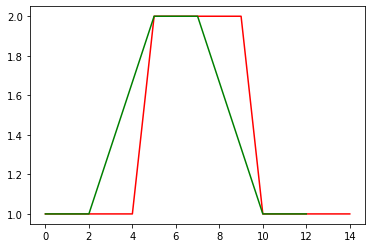

In [5]:
x = [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1]
plt.plot(x, "red")
plt.plot(moving_average(x, window_size=3), "green")

Notice that `y` differs in length from `x`, and that `y` is *shifted* in that the peaks above are not horizontally aligned.

Later in the course, we will see this same effect when using convolutions, and it will sometimes be convenient to enforce both equal length and centering (so that the peaks above are aligned). One common way of achieving this is to pad `x` with 0s on both sides before applying the moving average.

Before we get to the `padded_moving_average` function, let's go through a simple warm-up exercise:

#### Evaluate the expression `[0] * 5`

In [6]:
[0] * 5

[0, 0, 0, 0, 0]

If this result surprises you, remember that Python lists can contain *arbitrary items*, not just numerical values.

#### Evaluate the expressions `[0] + ['test']`

In [7]:
[0] + ['test']

[0, 'test']

#### Evaluate the expression `[0] + ['test'] * 5`

In [8]:
[0] + ['test'] * 5

[0, 'test', 'test', 'test', 'test', 'test']

#### Evaluate the expression [0] + ['a', 'b', 'c'] + [print] * 2

In [9]:
[0] + ['a', 'b', 'c'] + [print] * 2

[0, 'a', 'b', 'c', <function print>, <function print>]

Later, when we get to NumPy and PyTorch, we will see behavior that might be a bit more intuitive. Unlike Python lists, arrays and tensors will almost always store numerical values, and so we will see that (for example) `5 * np.array([1, 2, 3])` evaluates to `np.array([5, 10, 15])`.

#### Complete the `padded_moving_average` function below by zero padding both sides of the input `x` before passing it to your previous `moving_average` function.

In [10]:
def padded_moving_average(x, window_size=3):
    """ Compute a moving average.
    
    This differs from moving_average in that the input is first
    padded on both sides with an appropriate number of 0s, so that
    the output has the same length as x and so that x and y are
    aligned.
    
    Example: padded_moving_average([1.0, 1.0, 1.0], window_size=3) returns
        [(0 + 1 + 1) / 3, (1 + 1 + 1) / 3, (1 + 1 + 0) / 3]
        which has approximate values of [0.66, 1.0, 0.66].
    
    Args:
        x: A list of floats.
        window_size: A positive, odd integer that's less than the length of x.
        
    Returns:
        A list of floats.
    """
    zero_pad_count = int((window_size - 1) / 2)
    padded_x = ([0] * zero_pad_count) + x + ([0] * zero_pad_count)
    
    return moving_average(padded_x, window_size)

#### Create `x = [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1]` and plot both `x` and `y = padded_moving_average(x, window_size=3)` using `matplotlib`'s `plot` function. Be sure to verify that `x` is not modified after calling `padded_moving_average`.

[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1]


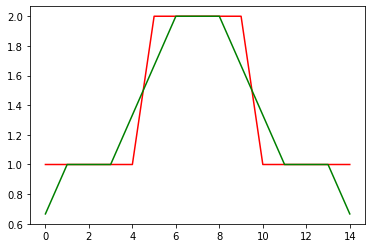

In [11]:
x = [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1]
plt.plot(x, "red")
plt.plot(padded_moving_average(x, window_size=3), "green")
print(x)

#### Does this padding procedure introduce any artifacts in our moving average?

In [12]:
moving_average(x, window_size=5)

[1, 1.2, 1.4, 1.6, 1.8, 2, 1.8, 1.6, 1.4, 1.2, 1]

In [13]:
padded_moving_average(x, window_size=5)

[0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 1.8, 1.6, 1.4, 1.2, 1, 0.8, 0.6]

As we can see above, the padded moving average function adds "`(window_size - 1)/2`" undesired entries on both ends of the moving average list.

### 1-D Data Normalization

#### Write a function `normalize` which takes in a list of 1-D data and returns a list of *normalized* data which is centered and scaled to have a mean of 0 and a standard deviation of 1. Be sure to include documentation using Google style docstrings, as done above.

In [14]:
def normalize(x):
  """ Normalize a list of 1-D data.

    Example: normalize([1.0, 2.0, 3.0]) returns
        [(1 - 2) / 1, (2 - 2) / 1, (3 - 2) / 1]
        which is [-1, 0, 1], having 0 mean and 1 standard deviation

    Args:
        x: A list of floats, to be normalized

    Returns:
        Normalized, list of floats, having 0 mean and 1 standard deviation
  """
  x_mean = mean(x)
  x_stdev = stdev(x)

  y = [(item - x_mean)/x_stdev for item in x]

  return y

In [15]:
normalize([1.0, 2.0, 3.0])

[-1.0, 0.0, 1.0]

#### Create `data = [10.3, 15.5, 12.7, 13.3, 8.9, 12.3, 14.6, 11.2, 12.8, 9.5]` and form `normalized_data` using your function. Compute the mean and standard deviation of `normalized_data`, and make sure that the mean is very close to 0.0 and that the standard deviation is very close to 1.0.

(Here, let's agree that `x` and `y` are 'very close' if the distance between them is less than $10^{-10}$.)

In [16]:
data = [10.3, 15.5, 12.7, 13.3, 8.9, 12.3, 14.6, 11.2, 12.8, 9.5]
normalized_data = normalize(data)
print("Before Normalizing:")
print("Mean:", mean(data))
print("Standard deviation:", stdev(data))
print("After Normalizing:")
print("Mean:", mean(normalized_data))
print("Standard deviation:", stdev(normalized_data))

Before Normalizing:
Mean: 12.11
Standard deviation: 2.139288562946933
After Normalizing:
Mean: 3.3584246494910984e-16
Standard deviation: 1.0


### Matrices as Lists of Rows

One way to represent matrices is as *lists* of *rows*, with each row having the same length. Here is an example:

In [17]:
A = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]
print(A)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


#### Write a function `transpose` which accepts a matrix in this form and *transposes* it. Be sure to include documentation using Google style docstrings, as done above.

For example, if `A` is defined as above, then `transpose(A)` should return `[[1, 4, 7], [2, 5, 8], [3, 6, 9]]`.

In [18]:
def transpose(x):
  """ Transpose a 2-D matrix.

    Example: transpose([[1, 2], [3, 4]]) returns
        [[1, 3], 
         [2, 4]]

    Args:
        x: A 2-D matrix as a list of rows, to be transposed

    Returns:
        Transposed 2-D matrix as a list of rows.
  """

  y = list(zip(*x))

  return y

In [19]:
A_T = transpose(A)
print(A_T)

[(1, 4, 7), (2, 5, 8), (3, 6, 9)]


Define `B = [[1, 2, 3, 4], [5, 6, 7, 8]]` and `B_T = transpose(B)`, and verify that `B_T` is correct.

In [20]:
B = [[1, 2, 3, 4],
     [5, 6, 7, 8]]
B_T = transpose(B)
print(B_T)
assert(B_T == [(1, 5), 
               (2, 6), 
               (3, 7), 
               (4, 8)])

[(1, 5), (2, 6), (3, 7), (4, 8)]


### Building a Vocabulary

Later in the course, when we deal with RNNs, we will likely build a character-level language model. For example, if our model is trained with English sentences, then we might expect that the following three probabilities go from high to low to lowest:

- $P$(next character is 'e' | previous characters were 'appl')
- $P$(next character is 'y' | previous characters were 'appl')
- $P$(next character is 'h' | previous characters were 'appl')

For now, suppose that our training data is one string (e.g. 100 MB of Wikipedia), and that our objective is to form a character vocabulary over these characters. For example, we would expect `form_char_vocab('this is cs382')` to return `[' ', '2', '3', '8', 'c', 'h', 'i', 's', 't']`, since these are the unique characters that are present.

#### Write a function `form_char_vocab` that takes in a string and returns a *sorted list* of the unique characters in that string. Be sure to include documentation using Google style docstrings, as done above.

In [21]:
def form_char_vocab(input_string):
    """ Build character vocabulary over the input_string.
    
    Example: form_char_vocab("hello world") returns
        ['d', 'e', 'h', 'l', 'o', 'r', 'w']
    
    Args:
        input_string: string, for building a character vocabulary
        
    Returns:
         A sorted list of the unique characters that make up the 
         character vocab for the input_string.
    """
    char_vocab_set = set(input_string)
    char_vocab_sorted_list = sorted(list(char_vocab_set))
    return char_vocab_sorted_list

In [22]:
form_char_vocab('this is cs382')

[' ', '2', '3', '8', 'c', 'h', 'i', 's', 't']

#### Print the output of your `form_char_vocab` function when run on the string `'this is a short string'`.

In [23]:
form_char_vocab("this is a short string")

[' ', 'a', 'g', 'h', 'i', 'n', 'o', 'r', 's', 't']

#### See how long your function takes to run on the following ~10 MB string by running the following code:

```
long_ish_string = 'this is a test' * 1000000
%timeit form_char_vocab(long_ish_string)
```

In [24]:
long_ish_string = 'this is a test' * 1000000
%timeit form_char_vocab(long_ish_string)

165 ms ± 4.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


(If this doesn't terminate in, say, 10s of seconds, then something is wrong.)

### In Place Operations

#### Complete the `replace_element` function below, which returns a new list with all occurrences of a particular element replaced. `replace_element` should not modify any of its arguments.

In [25]:
def replace_element(a_list, element, replacement):
    """ Replace all occurrences of an element in a list.
    
    a_list is not modified in place.
    
    Example:
        old_list = [1, 'a', 2, 'b', 'a', 1, 'b', 1]
        new_list = replace_element(old_list, 'b', 10)
        # new_list is now [1, 'a', 2, 10, 'a', 1, 10, 1]
    
    Args:
        a_list: A list.
        element: The element to be replaced.
        replacement: The replacement.
    
    Returns:
        A copy of a_list, with all occurrences of element replaced
        by replacement.
    """
    
    new_list = [replacement if item == element else item for item in a_list]
    
    return new_list

#### Verify that `replace_element` produces the expected output for the example in the documentation, and also verify that `replace_element` does not modify `old_list`.

In [26]:
old_list = [1, 'a', 2, 'b', 'a', 1, 'b', 1]
new_list = replace_element(old_list, 'b', 10)
print("Old List:", old_list)
assert(old_list == [1, 'a', 2, 'b', 'a', 1, 'b', 1])
print("New List:", new_list)

Old List: [1, 'a', 2, 'b', 'a', 1, 'b', 1]
New List: [1, 'a', 2, 10, 'a', 1, 10, 1]


#### Write a `replace_element_` function that replaces all occurrences of a particular element *in place*. That is, the function should not return anything; instead, its first argument should be *modified*. Be sure to include documentation using Google style docstrings, as done above.

In [27]:
def replace_element_(a_list, element, replacement):
    """ Replace all occurrences of an element in a list.
    
    a_list is modified in place.
    
    Example:
        old_list = [1, 'a', 2, 'b', 'a', 1, 'b', 1]
        new_list = replace_element_(old_list, 'b', 10)
        # old_list and new_list, both are now: [1, 'a', 2, 10, 'a', 1, 10, 1]
    
    Args:
        a_list: A list, that will be replaced in-place with 
                all the occurrences of "element" replaced with "replacement"
        element: The element to be replaced.
        replacement: The replacement.
    
    Returns:
        None
    """
    
    for i, item in enumerate(a_list):
      if item == element:
        a_list[i] = replacement

#### Create an example list and verify that your `replace_element_` function modifies the list as intended.

In [28]:
input_list = [1, 'a', 2, 'b', 'a', 1, 'b', 1]
print("Input list (before function call):", input_list)
replace_element_(input_list, 'b', 10)
print("Input list (after function call):", input_list)

Input list (before function call): [1, 'a', 2, 'b', 'a', 1, 'b', 1]
Input list (after function call): [1, 'a', 2, 10, 'a', 1, 10, 1]


### Indexing with Arbitrary Indices

It is often useful to pluck out the elements from a list that are at specified indices.

In [29]:
some_indices = [2**i - i for i in range(16)]
print(some_indices)

[1, 1, 2, 5, 12, 27, 58, 121, 248, 503, 1014, 2037, 4084, 8179, 16370, 32753]


#### Complete the following code to form `some_elements` by plucking out elements of `long_ish_string` according to `some_indices`.

In [30]:
some_elements = [long_ish_string[index] for index in some_indices] # this is assuming that some_indices refers to the list's indices that starts from zero
print(some_elements)

['h', 'h', 'i', 'i', 's', 't', 'i', ' ', 't', 't', 's', ' ', 't', 's', ' ', ' ']


### Zip and String Formatting

#### Loop through the following lists and print sentences such as 'Geoffrey Hinton is affiliated with U of T.' *without ever accessing the lists by index*.

In [31]:
first_names = ['Geoffrey', 'Yoshua', 'Juergen']
last_names = ['Hinton', 'Bengio', 'Schmidhuber']
affiliations = ['U of T', 'U of M', 'IDSIA']

for first_name, last_name, affiliation in zip(*[first_names, last_names, affiliations]):
  print(first_name, last_name, "is affiliated with", affiliation)

Geoffrey Hinton is affiliated with U of T
Yoshua Bengio is affiliated with U of M
Juergen Schmidhuber is affiliated with IDSIA
